# Criando uma rede neural
Ok, agora você chegou à parte emocionante deste tutorial! Chega de matemática e explicações complexas. É hora de colocar a mão na massa e treinar uma rede neural muito básica.

Conforme declarado anteriormente, este guia é baseado no seguinte tutorial do TensorFlow. 

https://www.tensorflow.org/tutorials/keras/classification

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

/Library/Python/3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Conjunto de dados (Dataset)

Para este tutorial usaremos o conjunto de dados de moda MNIST. Este é um conjunto de dados incluído no keras.

Este conjunto de dados inclui 60.000 imagens para treinamento e 10.000 imagens para validação/teste.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist #carrega o dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # separa entre teste e treino

In [3]:
train_images.shape # aqui vemos que que temos 60,000 imagens  feitas de 28x28 pixels(784 no total)

(60000, 28, 28)

O valor dos nossos pixels estão entre 0 e 255, onde 0 é preto e 255 é branco. Isso quer dizer que nós temos uma imagem em escala de ciza como não há canais de cores.

In [4]:
train_images[0,23,23] # vamos dar uma olhada em um pixel

194

Nossos rotulos são interios com alcançe de 0 a 9. Cada inteiro representa um artigo especifico de roupa.

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Vamos criar um array com os nomes para indicar estes rotulos.   

In [6]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Finalmente vamos dar uma olhada em como alguma dessas iamgens são!

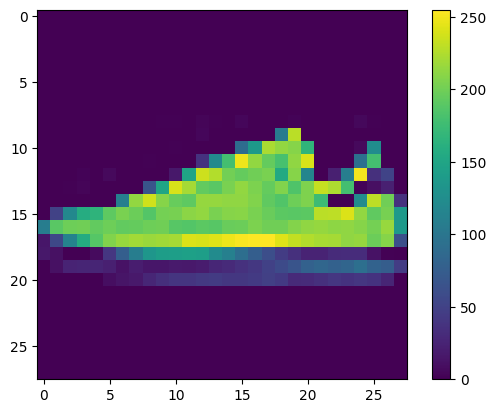

In [7]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

### Pré-processamento de dados
A última etapa antes de criar nosso modelo é pré-processar nossos dados. Isso significa simplesmente aplicar algumas transformações anteriores aos nossos dados antes de alimentá-los no modelo. 

Nesse caso, simplesmente dimensionaremos todos os nossos valores de pixels em escala de cinza (0-255) para ficarem entre 0 e 1. Podemos fazer isso dividindo cada valor nos conjuntos de treinamento e teste por 255,0. 

Fazemos isso porque valores menores tornarão mais fácil para o modelo processar nossos valores.

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

## Construindo o Modelo

Agora é hora de construir o modelo! Usaremos um modelo sequencial keras com três camadas diferentes. Este modelo representa uma rede neural feed-forward (aquela que passa valores da esquerda para a direita). Descreveremos cada camada e sua arquitetura a seguir.

**Camada 1**: Esta é a nossa camada de entrada e será composta por 784 neurônios. Usamos a camada achatada com um formato de entrada de (28,28) para indicar que nossa entrada deve vir nesse formato. O achatamento significa que nossa camada remodelará a matriz de forma (28,28) em um vetor de 784 neurônios, de modo que cada pixel será associado a um neurônio.

**Camada 2**: Esta é a nossa primeira e única camada oculta. O denso denota que esta camada estará totalmente conectada e cada neurônio da camada anterior se conecta a cada neurônio desta camada. Possui 128 neurônios e utiliza a função de ativação de unidade linear de retificação.

**Camada 3**: Esta é a nossa saída posterior e também é uma camada densa. Ele tem 10 neurônios que examinaremos para determinar a saída de nossos modelos. Cada neuro representa a probabilidade de uma determinada imagem ser uma das 10 classes diferentes. A função de ativação softmax é usada nesta camada para calcular uma distribuição de probabilidade para cada classe. Isso significa que o valor de qualquer neurônio nesta camada estará entre 0 e 1, onde 1 representa uma alta probabilidade da imagem ser dessa classe.

In [9]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)), # colocando(1)
                          keras.layers.Dense(128, activation='relu'), # escondendo camada (2)
                          keras.layers.Dense(10,activation= 'softmax') # escondendo camada (3)
                         
])

/Library/Python/3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compilnado o modelo ###

A última etapa na construção do modelo é definir a função de perda, o otimizador e as métricas que gostaríamos de rastrear.

In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Treinando o modelo ###

Agora é finalmente hora de treinar o modelo. Como já fizemos todo o trabalho em nossos dados, esta etapa é tão fácil quanto chamar um único método.

In [37]:
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - accuracy: 0.9800 - loss: 0.0537
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 861us/step - accuracy: 0.9802 - loss: 0.0561
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.9792 - loss: 0.0568
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.9799 - loss: 0.0564
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - accuracy: 0.9824 - loss: 0.0482
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 883us/step - accuracy: 0.9806 - loss: 0.0518
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.9781 - loss: 0.0582
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - accuracy: 0.9776 - loss: 0.0601


### Avaliando o modelo

Agora é hora de testar/avaliar o modelo. Podemos fazer isso facilmente usando outro método integrado do keras.
O argumento detalhado é definido na documentação do keras como: "detalhado: 0 ou 1. Modo de verbosidade. 0 = silencioso, 1 = barra de progresso." (https://keras.io/models/sequential/)

In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy: ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8846 - loss: 0.7896
Test accuracy:  0.8848999738693237


### Fazendo previsões

Para fazer previsões, precisamos simplesmente passar um array de dados na forma que especificamos na camada de entrada para o método .`predict()`.

In [39]:
predictions = model.predict(test_images) # este metodo retorna um array de previsões para cada imagem passada.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


In [40]:
predictions[0] #esta é a previsão da imagem 1 

array([1.8421468e-37, 2.6532759e-24, 2.1189272e-26, 0.0000000e+00,
       1.8555409e-36, 4.7508309e-14, 7.5493252e-29, 5.9363061e-09,
       1.0096517e-30, 1.0000000e+00], dtype=float32)

Ankle boot


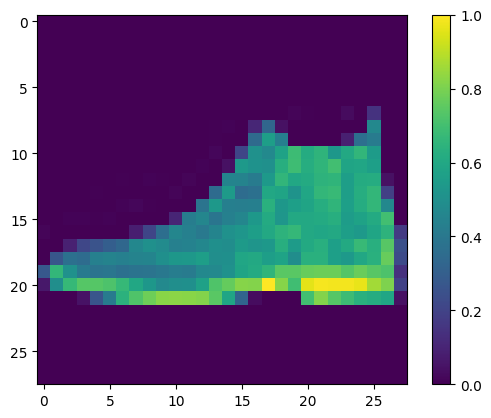

In [41]:
print(class_name[np.argmax(predictions[0])])
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Verificando previsões

Escrevi uma pequena função aqui para nos ajudar a verificar as previsões com alguns recursos visuais simples.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


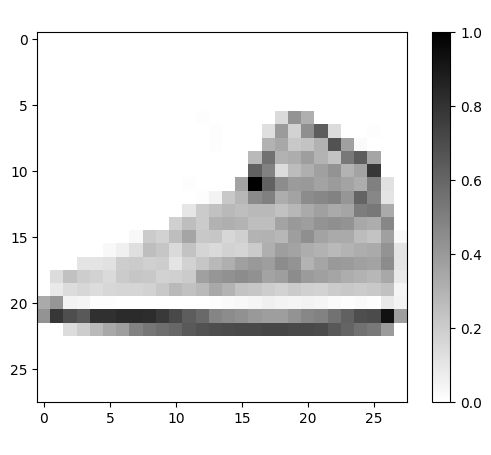

In [46]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_name = ['Camiseta/topo', 'Calça', 'Pulôver', 'Vestido', 'Casaco',
              'Sandalha', 'Camisa', 'Tênis', 'Bolsa', 'Bota']
    prediction = model.predict(np.array([image]))  # Passe a imagem diretamente para o modelo sem np.argmax()
    predicted_class = class_name[np.argmax(prediction)]
    
    show_image(image, class_name[correct_label], predicted_class)
    
def show_image(img, expected_label, guessed_label):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title('Esperado: ' + expected_label)  # Adicionando o rótulo esperado ao título
    plt.xlabel("Previsto: " + guessed_label)  # Adicionando o rótulo previsto ao eixo x
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
def get_number():
    while True:
        num = input('Escolha um número: ')
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print('Tente novamente...')

num = get_number()
image =  test_images[num]
label = test_labels[num]
predict(model, image, label)
